### Anpassning av kurva i allmänhet

Scientific python kan anpassa en godtycklig kurva med givna parametrar till data.

Kommandot som gör detta heter `curve_fit()` och finns i scipy.optimize.

Kommandet har formen `curve_fit(funktionsnamn, xdata, ydata)`
Det finns fler argument men de behövs inte nu.

I exemplet nedan genererar vi data från en sinusfunktion och adderar lite normalfördelat brus till y-värdena. Sedan använder vi curve_fit för anpassningen. Sist plottar vi data och den framräknade anpassade kurvan.

Koefficienter för sinus-funktionen:
[3.44679175 1.32968558]


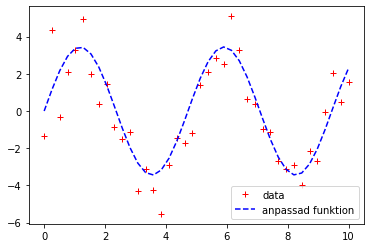

In [19]:
import numpy as np
from matplotlib import pyplot as plt

# curve-fit() från scipy
from scipy.optimize import curve_fit

# 40 x-värden from 0 tom 10
x = np.linspace(0, 10, num = 40)

# Data att arbeta med. En sinuskurva med brus från normalfördelning
y = 3.45 * np.sin(1.334 * x) + np.random.normal(size = 40)

# Vi anger själv den exakta formen på den funktion som ska anpassas
# Måste ange variabel(x-värden) först och parametrar därefter
def test(x, a, b):
	return a * np.sin(b * x)


# curve-fit() tar som argument: funktionen, x-data och y-data
# ut får vi parametrar i en lista (param namnger vi den till)
# och kovarianser i en annan lista (som får heta param_cov)
param, param_cov = curve_fit(test, x, y)

# Vi skriver ut resultatet
print("Koefficienter för sinus-funktionen:")
print(param)
# print("Kovarians-matrisen för koefficienterna:")
# print(param_cov)

# För att kunna rita vår anpassade funktion så skapar vi y-data (ans)
ans = (param[0]*(np.sin(param[1]*x)))

# Och så vill vi titta på det grafiskt
plt.plot(x, y, '+', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="anpassad funktion")
plt.legend()
plt.show()


Parametrar är förinställda på värdet 1. Det kan vara ett dåligt val och algoritmen kommer kanske inte att konvergera till en lösning.
Man kan ange förslag på startvärden på parametrar.
I nedanstående exempel mäts temperaturen för upphettning av ett modell-hus.
Temperaturen går mellan cirka 20 och 45 grader Celsius. Vi ska anpassa en exponentialfunktion på formen (först snabbt stigande sedan asymptotiskt avplanad)

`a * (1 - np.exp(-c * x)) + b`

Vi kan då rimligen välja parametern b till 20 och a till 25. Det tar några hundratal sekunder för kurvan att stiga så c kan sättas till 0,01 (många val är möjliga).
Parametrar kan anges i en lista efter x och y data:

`param, param_cov = curve_fit(test, x, y, [25,20,0.01])`

Koden kör först utan förslag på parametrar och det bör då bli ett dåligt resultat. Ändra sedan vad som är kommenterat och kör igen; det ska då ge ett bra resultat.

Koefficienter för funktionen:
[115.91287744 -84.69568232   1.        ]
Kovarians-matrisen för koefficienterna:
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


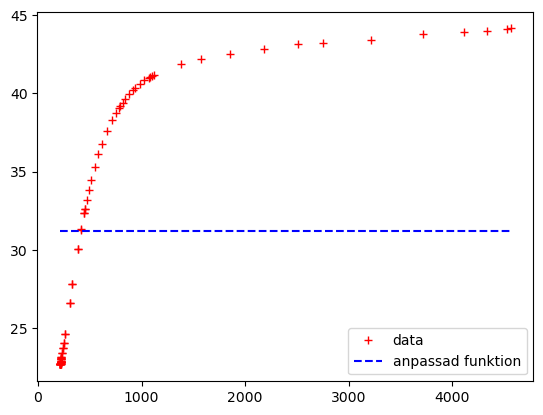

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import csv


# curve-fit() från scipy
from scipy.optimize import curve_fit



x=[]; y=[]
with open('Hus230908reduc.csv','r') as f:
  data = csv.reader(f)
  i=0
  for row in data:
         x.append(float(row[0]))
         y.append(float(row[1]))

x=np.array(x)
y=np.array(y)


# Vi anger själv den exakta formen på den funktion som ska anpassas
# Måste ange variabel(x-värden) först och parametrar därefter
def test(x, a, b, c):
	return a * (1 - np.exp(-c * x)) + b


# curve-fit() tar som argument: funktionen, x-data och y-data
# ut får vi parametrar i en lista (param namnger vi den till)
# och kovarianser i en annan lista (som får heta param_cov)
# Ändra vad som är kommenterat här nedan!
param, param_cov = curve_fit(test, x, y)
#param, param_cov = curve_fit(test, x, y, [25,20,0.01])

# Vi skriver ut resultatet
print("Koefficienter för funktionen:")
print(param)
print("Kovarians-matrisen för koefficienterna:")
print(param_cov)

# För att kunna rita vår anpassade funktion så skapar vi y-data (ans)

ans = param[0] * (1 - np.exp(-param[2] * x)) + param[1]

# Och så vill vi titta på det grafiskt
plt.plot(x, y, '+', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="anpassad funktion")
plt.legend()
plt.show()


## Uppgifter

**Uppgift 1**

Anpassa en Gauss-kurva till en statistisk fördelning.

En normalfördelning eller Gauss-kurva beskrivs av

$$G(x)=Ae^{-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}}$$

Uttrycket har 3 parametrar: $A$ som anger maxvärdet; $\sigma$ som är standardavvikelsen; $\mu$ anger medelvärdet.

Generera värden med formeln för Gauss-kurvan och adderar brus. Därefter anpassa en Gauss-kurva.


<!--[Lösningsförslag](./uppg/funcfitUppgift1.ipynb)-->